In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irisdata/Iris.csv


In [20]:
df=pd.read_csv('/kaggle/input/irisdata/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df.shape

(150, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


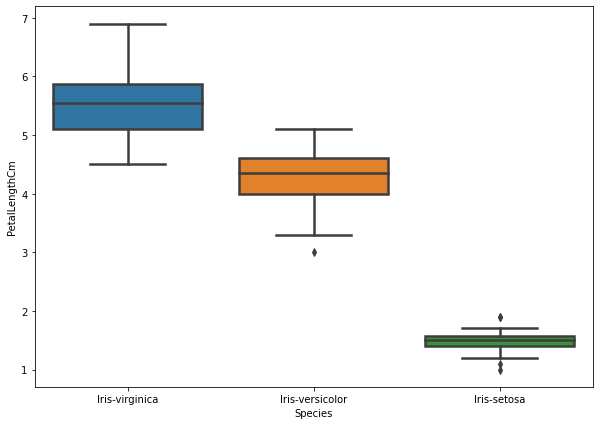

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=df,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

In [26]:
y=df['Species']
df.drop(['Species'],axis=1,inplace=True)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
c=cross_val_score(DecisionTreeClassifier(), df, y, cv=5)
print(np.mean(c))

0.9666666666666668


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y,shuffle=True, test_size=0.20, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param={'criterion':['gini', 'entropy'], 'max_depth':np.linspace(1, 32, 31),'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),'max_features':['auto', 'sqrt', 'log2',None]}
clf=GridSearchCV(DecisionTreeClassifier(),param,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1.        ,  2.03333333,  3.06666667,  4.1       ,  5.13333333,
        6.16666667,  7.2       ,  8.23333333,  9.26666667, 10.3       ,
       11.33333333, 12.36666667, 13.4       , 14.43333333, 15.46666667,
       16.5       , 17.53333333, 18.56666667, 19.6       , 20.63333333,
       21.66666667, 22.7       , 23.73333333, 24.76666667, 25.8       ,
       26.83333333, 27.86666667, 28.9       , 29.93333333, 30.96666667,
       32.        ]),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy')

In [30]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3.066666666666667, max_features='sqrt',
                       min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.1)

In [39]:
clf.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7.200000000000001,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.30000000000000004,
 'min_samples_split': 0.6,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [40]:
clf.best_estimator_.score(x_test,y_test)

1.0

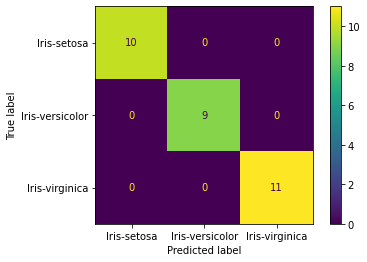

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)

In [50]:
clf.best_estimator_.score(x_train,y_train)

0.95

In [56]:
from sklearn.metrics import classification_report
y_pred=clf.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



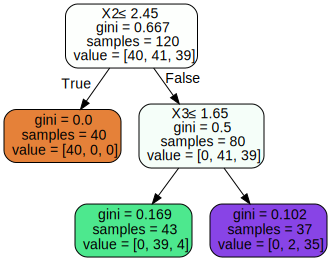

In [48]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf.best_estimator_,filled=True, rounded=True, special_characters=True,out_file=None)
graph